In [1]:
import os
import numpy as np
import pandas as pd
import math

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
folder = r"G:\Study material\Data Science\Datasets\TransparentConductors"
os.listdir(folder)

PermissionError: [WinError 21] The device is not ready: 'G:\\Study material\\Data Science\\Datasets\\TransparentConductors'

In [6]:
#os.listdir(os.path.join(folder,'train'))
mat = pd.read_csv(os.path.join(folder,'train_main.csv'))

In [8]:
mat.head().T

,0,1,2,3,4
id,1.0000,2.0000,3.0000,4.0000,5.0000
spacegroup,33.0000,194.0000,227.0000,167.0000,194.0000
number_of_total_atoms,80.0000,80.0000,40.0000,30.0000,80.0000
percent_atom_al,0.6250,0.6250,0.8125,0.7500,0.0000
percent_atom_ga,0.3750,0.3750,0.1875,0.0000,0.6250
percent_atom_in,0.0000,0.0000,0.0000,0.2500,0.3750
lattice_vector_1_ang,9.9523,6.1840,9.7510,5.0036,6.6614
lattice_vector_2_ang,8.5513,6.1838,5.6595,5.0034,6.6612
lattice_vector_3_ang,9.1775,23.6287,13.9630,13.5318,24.5813
lattice_angle_alpha_degree,90.0026,90.0186,90.9688,89.9888,89.9960


In [147]:
#Columns for dataframe
a_cols = ['lv1_1','lv1_2','lv1_3','lv2_1','lv2_2','lv2_3','lv3_1','lv3_2','lv3_3']

In [148]:
for i in range(1,81):
    a_cols.append('col'+str(i)+'_1')
    a_cols.append('col'+str(i)+'_2')
    a_cols.append('col'+str(i)+'_3')
    a_cols.append('col'+str(i)+'_4')

In [149]:
df_main = pd.DataFrame(columns = a_cols)

In [150]:
#col names are in a_cols
for j in range(1,2401):
    df = pd.DataFrame(np.zeros(shape=(1,len(a_cols))),columns = a_cols)
    cont = open(os.path.join(folder,'train',str(j),'geometry.xyz'),'r')
    lines = cont.read().split("\n")
    for i in range(3,len(lines)-1):
        if i < 6:            
            df.iloc[0,3*(i-3)+0] = lines[i].split(" ")[1]
            df.iloc[0,3*(i-3)+1] = lines[i].split(" ")[2]
            df.iloc[0,3*(i-3)+2] = lines[i].split(" ")[3]
        else:
            df.iloc[0,4*(i-4)+1] = lines[i].split(" ")[1]
            df.iloc[0,4*(i-4)+2] = lines[i].split(" ")[2]
            df.iloc[0,4*(i-4)+3] = lines[i].split(" ")[3]
            if lines[i].split(" ")[4] == 'Al':
                df.iloc[0,4*(i-4)+4] = 1
            elif lines[i].split(" ")[4] == 'Ga':
                df.iloc[0,4*(i-4)+4] = 2
            elif lines[i].split(" ")[4] == 'In':
                df.iloc[0,4*(i-4)+4] = 3
            elif lines[i].split(" ")[4] == 'O':
                df.iloc[0,4*(i-4)+4] = 4
    cont.close()
    df_main = df_main.append(df)
    del df

In [151]:
df_main = df_main.reset_index()

In [152]:
df_main.drop('index',axis=1,inplace=True)

In [153]:
df_main.head()

,lv1_1,lv1_2,lv1_3,lv2_1,lv2_2,lv2_3,lv3_1,lv3_2,lv3_3,col1_1,...,col78_3,col78_4,col79_1,col79_2,col79_3,col79_4,col80_1,col80_2,col80_3,col80_4
0,9.9520877199999997,-0.0472482400000000,-0.0346579300000000,0.0403159900000000,8.5511748500000007,-0.0095337700000000,0.0316403800000000,0.0096659200000000,9.1774391200000007,1.6088879366700000,...,3.6373638314700005,4.0,1.7205447579699999,4.2677978738300002,8.2491153245300008,4.0,6.6965886179700007,4.2441737538300002,8.2317863595300000,4.0
1,6.1800361500000003,0.2080821800000000,0.0728967200000000,-3.2706824499999998,5.2480355899999998,-0.0097211800000000,-0.2732973100000000,-0.1356133200000000,23.6267165000000006,-0.0683243275000000,...,20.7098252975000001,4.0,1.3521903587500002,2.6772038899999999,8.8916064575000000,4.0,1.2155417037500003,2.6093972299999999,20.7049647075000003,4.0
2,9.7505898099999992,-0.0386961200000000,-0.0802534200000000,4.8867298999999997,2.8546359099999998,-0.0358693200000000,-0.1587845000000000,-0.0208269900000000,13.9620565299999999,7.9733229971939803,...,0,0.0,0,0,0,0.0,0,0,0,0.0
3,5.0035572600000000,0.0244765200000000,0.0037758800000000,-2.5229688499999998,4.3206643500000004,-0.0066246100000000,-0.0131032900000000,0.0161678900000000,13.5317611200000005,-0.0018999770500000,...,0,0.0,0,0,0,0.0,0,0,0,0.0
4,6.6603975699999998,-0.1173115700000000,0.0111464600000000,-3.2274505100000002,5.8270566199999996,0.0229992200000000,-0.0434914000000000,-0.1191254800000000,24.5809284400000010,-0.0108728500000000,...,21.5138856149999995,4.0,1.7001642549999998,2.8102004699999998,9.2349210050000003,4.0,1.6784185549999997,2.7506377299999998,21.5253852250000008,4.0


In [154]:
fin = pd.concat([mat,df_main],axis=1)

In [163]:
fin.head().T

,0,1,2,3,4
id,1,2,3,4,5
spacegroup,33,194,227,167,194
number_of_total_atoms,80,80,40,30,80
percent_atom_al,0.625,0.625,0.8125,0.75,0
percent_atom_ga,0.375,0.375,0.1875,0,0.625
percent_atom_in,0,0,0,0.25,0.375
lattice_vector_1_ang,9.9523,6.184,9.751,5.0036,6.6614
lattice_vector_2_ang,8.5513,6.1838,5.6595,5.0034,6.6612
lattice_vector_3_ang,9.1775,23.6287,13.963,13.5318,24.5813
lattice_angle_alpha_degree,90.0026,90.0186,90.9688,89.9888,89.996


In [156]:
fin.to_csv(os.path.join(folder,'training.csv'))

In [205]:
fin = pd.read_csv(os.path.join(folder,'training.csv'))

In [322]:
fin.spacegroup.unique()

array([ 33, 194, 227, 167, 206,  12], dtype=int64)

In [206]:
X = fin.drop(['formation_energy_ev_natom','bandgap_energy_ev'],axis=1)
y1 = fin['formation_energy_ev_natom']
y2 = fin['bandgap_energy_ev']

In [207]:
spgrp = pd.get_dummies(X['spacegroup'], prefix='sp')

In [208]:
X = pd.concat([X,spgrp],axis=1)

In [209]:
X.drop(['spacegroup','id','Unnamed: 0'],axis=1,inplace=True)

In [210]:
X.head().T

,0,1,2,3,4
number_of_total_atoms,80.000000,80.000000,40.000000,30.000000,80.000000
percent_atom_al,0.625000,0.625000,0.812500,0.750000,0.000000
percent_atom_ga,0.375000,0.375000,0.187500,0.000000,0.625000
percent_atom_in,0.000000,0.000000,0.000000,0.250000,0.375000
lattice_vector_1_ang,9.952300,6.184000,9.751000,5.003600,6.661400
lattice_vector_2_ang,8.551300,6.183800,5.659500,5.003400,6.661200
lattice_vector_3_ang,9.177500,23.628700,13.963000,13.531800,24.581300
lattice_angle_alpha_degree,90.002600,90.018600,90.968800,89.988800,89.996000
lattice_angle_beta_degree,90.002300,89.998000,91.122800,90.011900,90.000600
lattice_angle_gamma_degree,90.001700,120.002500,30.518500,120.001700,119.989300


In [300]:
#Split in train and test, then Normalise and use MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

trainX,valX,trainY,valY = train_test_split(X,y1,random_state = 40,test_size = 0.3)

In [301]:
scaler = MinMaxScaler()
s_trainX = scaler.fit_transform(trainX)
s_valX = scaler.transform(valX)

In [302]:
from sklearn.neural_network import MLPRegressor as NN
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression,Ridge

In [303]:
var = [0.998,0.999]
for k in var:
    model = Ridge(alpha = k,normalize = False,random_state = 40)
    model.fit(s_trainX,trainY)
    print(k,model.score(s_trainX,trainY),model.score(s_valX,valY))

0.998 0.645619197 0.551230062963
0.999 0.64560542748 0.55121659888


In [304]:
hl = [i for i in range(180,220,4)]

In [305]:
t_s = []
v_s = []
for k in hl:    
    model = NN((k,k,k,k,k),random_state = 40)
    model.fit(s_trainX,trainY)
    t_s.append(model.score(s_trainX,trainY))
    v_s.append(model.score(s_valX,valY))

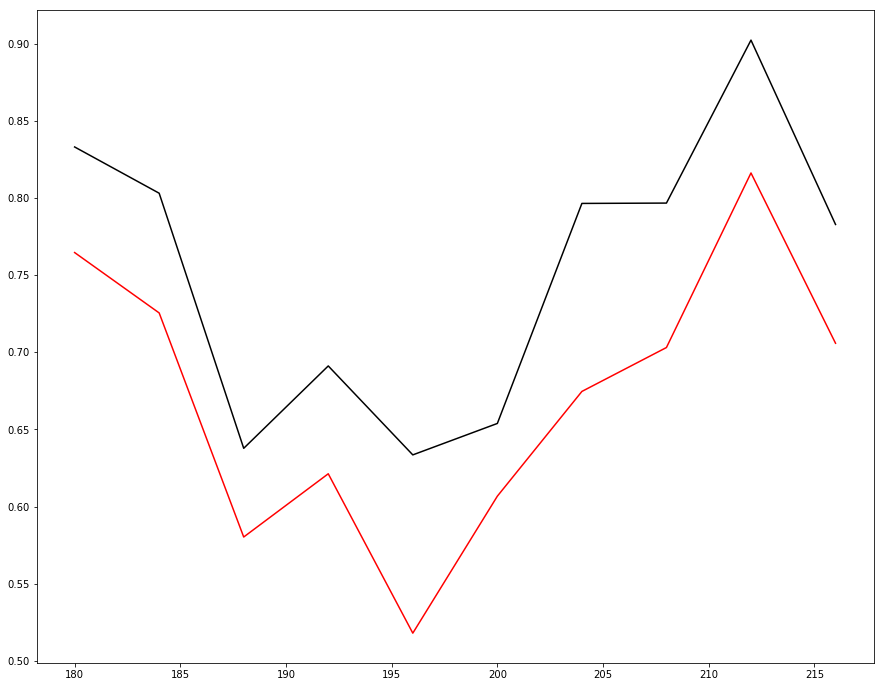

In [306]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12))
plt.plot(hl,t_s,c = "black")
plt.plot(hl,v_s,c = "red")
plt.show()

In [307]:
max(v_s)

0.81618953190568155

In [308]:
hl[np.argmax(v_s)]

212

In [255]:
#212 hidden units with 5 layers for y1

In [310]:
scaler2 = MinMaxScaler()
trainX2,valX2,trainY2,valY2 = train_test_split(X,y2,random_state = 40,test_size = 0.3)
s_trainX2 = scaler2.fit_transform(trainX2)
s_valX2 = scaler2.transform(valX2)

In [311]:
hl2 = [i for i in range(130,156,2)]

In [312]:
t_s2 = []
v_s2 = []
for k in hl2:    
    model2 = NN((k,k,k,k,k),random_state = 40)
    model2.fit(s_trainX2,trainY2)
    t_s2.append(model2.score(s_trainX2,trainY2))
    v_s2.append(model2.score(s_valX2,valY2))

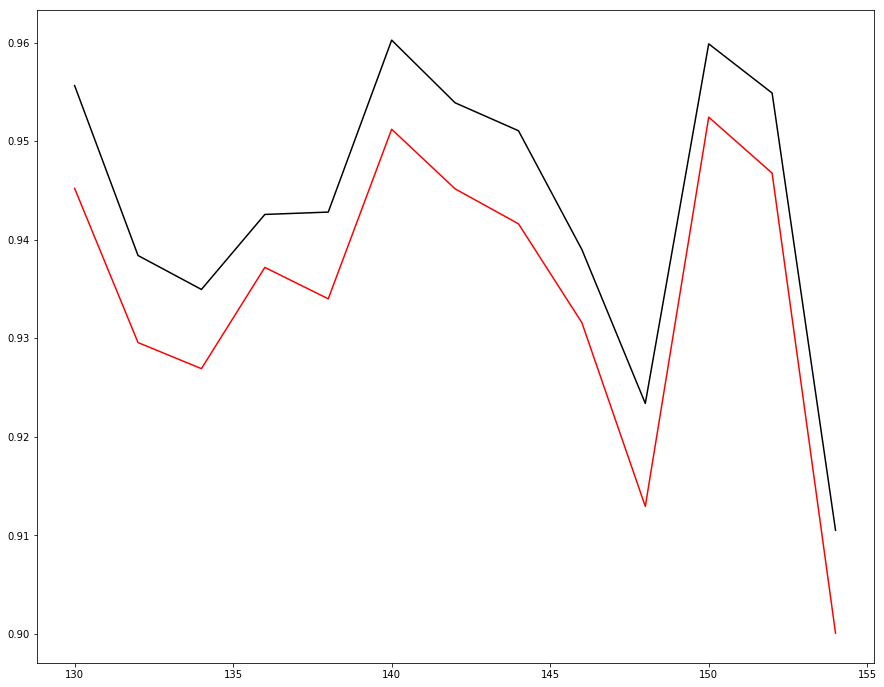

In [313]:
plt.figure(figsize=(15, 12))
plt.plot(hl2,t_s2,c = "black")
plt.plot(hl2,v_s2,c = "red")
plt.show()

In [314]:
max(v_s2)

0.95242994095948752

In [315]:
hl2[np.argmax(v_s2)]

150

In [316]:
#150 hidden units with 5 layers for y2

In [317]:
k1 = 212
model = NN((k1,k1,k1,k1,k1),random_state = 40)
model.fit(s_trainX,trainY)

k2 = 150
model2 = NN((k2,k2,k2,k2,k2),random_state = 40)
model2.fit(s_trainX2,trainY2)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150, 150, 150, 150),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=40,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [318]:
#take test file and predict
mat2 = pd.read_csv(os.path.join(folder,'test_main.csv'))

In [321]:
mat2.spacegroup.unique()

array([ 33, 167,  12, 206, 194, 227], dtype=int64)

In [323]:
df_main2 = pd.DataFrame(columns = a_cols)
#col names are in a_cols
for j in range(1,601):
    df = pd.DataFrame(np.zeros(shape=(1,len(a_cols))),columns = a_cols)
    cont = open(os.path.join(folder,'test',str(j),'geometry.xyz'),'r')
    lines = cont.read().split("\n")
    for i in range(3,len(lines)-1):
        if i < 6:            
            df.iloc[0,3*(i-3)+0] = lines[i].split(" ")[1]
            df.iloc[0,3*(i-3)+1] = lines[i].split(" ")[2]
            df.iloc[0,3*(i-3)+2] = lines[i].split(" ")[3]
        else:
            df.iloc[0,4*(i-4)+1] = lines[i].split(" ")[1]
            df.iloc[0,4*(i-4)+2] = lines[i].split(" ")[2]
            df.iloc[0,4*(i-4)+3] = lines[i].split(" ")[3]
            if lines[i].split(" ")[4] == 'Al':
                df.iloc[0,4*(i-4)+4] = 1
            elif lines[i].split(" ")[4] == 'Ga':
                df.iloc[0,4*(i-4)+4] = 2
            elif lines[i].split(" ")[4] == 'In':
                df.iloc[0,4*(i-4)+4] = 3
            elif lines[i].split(" ")[4] == 'O':
                df.iloc[0,4*(i-4)+4] = 4
    cont.close()
    df_main2 = df_main2.append(df)
    del df
df_main2 = df_main2.reset_index()

In [324]:
df_main2.head()

,index,lv1_1,lv1_2,lv1_3,lv2_1,lv2_2,lv2_3,lv3_1,lv3_2,lv3_3,col1_1,col1_2,col1_3,col1_4,col2_1,col2_2,col2_3,col2_4,col3_1,col3_2,col3_3,col3_4,col4_1,col4_2,col4_3,col4_4,col5_1,col5_2,col5_3,col5_4,col6_1,col6_2,col6_3,col6_4,col7_1,col7_2,col7_3,col7_4,col8_1,col8_2,col8_3,col8_4,col9_1,col9_2,col9_3,col9_4,col10_1,col10_2,col10_3,col10_4,col11_1,col11_2,col11_3,col11_4,col12_1,col12_2,col12_3,col12_4,col13_1,col13_2,col13_3,col13_4,col14_1,col14_2,col14_3,col14_4,col15_1,col15_2,col15_3,col15_4,col16_1,col16_2,col16_3,col16_4,col17_1,col17_2,col17_3,col17_4,col18_1,col18_2,col18_3,col18_4,col19_1,col19_2,col19_3,col19_4,col20_1,col20_2,col20_3,col20_4,col21_1,col21_2,col21_3,col21_4,col22_1,col22_2,col22_3,col22_4,col23_1,col23_2,col23_3,col23_4,col24_1,col24_2,col24_3,col24_4,col25_1,col25_2,col25_3,col25_4,col26_1,col26_2,col26_3,col26_4,col27_1,col27_2,col27_3,col27_4,col28_1,col28_2,col28_3,col28_4,col29_1,col29_2,col29_3,col29_4,col30_1,col30_2,col30_3,col30_4,col31_1,col31_2,col31_3,col31_4,col32_1,col32_2,col32_3,col32_4,col33_1,col33_2,col33_3,col33_4,col34_1,col34_2,col34_3,col34_4,col35_1,col35_2,col35_3,col35_4,col36_1,col36_2,col36_3,col36_4,col37_1,col37_2,col37_3,col37_4,col38_1,col38_2,col38_3,col38_4,col39_1,col39_2,col39_3,col39_4,col40_1,col40_2,col40_3,col40_4,col41_1,col41_2,col41_3,col41_4,col42_1,col42_2,col42_3,col42_4,col43_1,col43_2,col43_3,col43_4,col44_1,col44_2,col44_3,col44_4,col45_1,col45_2,col45_3,col45_4,col46_1,col46_2,col46_3,col46_4,col47_1,col47_2,col47_3,col47_4,col48_1,col48_2,col48_3,col48_4,col49_1,col49_2,col49_3,col49_4,col50_1,col50_2,col50_3,col50_4,col51_1,col51_2,col51_3,col51_4,col52_1,col52_2,col52_3,col52_4,col53_1,col53_2,col53_3,col53_4,col54_1,col54_2,col54_3,col54_4,col55_1,col55_2,col55_3,col55_4,col56_1,col56_2,col56_3,col56_4,col57_1,col57_2,col57_3,col57_4,col58_1,col58_2,col58_3,col58_4,col59_1,col59_2,col59_3,col59_4,col60_1,col60_2,col60_3,col60_4,col61_1,col61_2,col61_3,col61_4,col62_1,col62_2,col62_3,col62_4,col63_1,col63_2,col63_3,col63_4,col64_1,col64_2,col64_3,col64_4,col65_1,col65_2,col65_3,col65_4,col66_1,col66_2,col66_3,col66_4,col67_1,col67_2,col67_3,col67_4,col68_1,col68_2,col68_3,col68_4,col69_1,col69_2,col69_3,col69_4,col70_1,col70_2,col70_3,col70_4,col71_1,col71_2,col71_3,col71_4,col72_1,col72_2,col72_3,col72_4,col73_1,col73_2,col73_3,col73_4,col74_1,col74_2,col74_3,col74_4,col75_1,col75_2,col75_3,col75_4,col76_1,col76_2,col76_3,col76_4,col77_1,col77_2,col77_3,col77_4,col78_1,col78_2,col78_3,col78_4,col79_1,col79_2,col79_3,col79_4,col80_1,col80_2,col80_3,col80_4
0,0,10.5378440999999992,-0.0416559800000000,-0.0546684100000000,0.0353999200000000,9.0140084100000006,-0.0275333100000000,0.0500609000000000,0.0292891200000000,9.6359329900000006,1.7089214588200001,7.6848373406700006,6.6842861752599996,3.0,6.9778435088199995,7.6640093506700007,6.6569519702599997,3.0,3.6401549557799990,1.3345275526100000,1.8753704028000002,3.0,8.9090770057800004,1.3136995626100001,1.8480361978000002,3.0,1.0128447146199999,3.1657712464300003,1.8834757766800001,3.0,6.2817667646199995,3.1449432564299999,1.8561415716800003,3.0,4.3362316999799990,5.8535936468500003,6.6761808013800001,2.0,9.6051537499800013,5.8327656568500004,6.6488465963800003,1.0,0.9664301943099999,5.9274893235700006,-0.0230097406750000,2.0,6.2353522443100005,5.9066613335700007,-0.0503439456750000,3.0,4.3629222256899993,3.0803356564300000,4.7861087206750001,2.0,9.6318442756899980,3.0595076664300001,4.7587745156750003,2.0,1.7219476154100000,1.4321721039900002,4.8048419522149999,2.0,6.9908696654099991,1.4113441139900000,4.7775077472150000,1.0,3.6574657045899999,7.6049419960100000,9.5941900177850012,1.0,8.9263877545900012,7.5841140060100001,9.5668558127850005,3.0,0.9362517411000001,0.2961809808600000,9.6208789112700011,3.0,6.2051737910999982,0.2753529908600000,9.5935447062700003,2.0,4.4430614570999989,8.7408745409000002,4.7588811927500005,2.0,9.7119835070999994,8.7200465508999994,4.7315469877500007,2.0,1.793024467300

In [325]:
df_main2.drop('index',axis=1,inplace=True)
fin2 = pd.concat([mat2,df_main2],axis=1)
fin2.to_csv(os.path.join(folder,'testing.csv'))

In [326]:
fin2.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lv1_1,lv1_2,lv1_3,lv2_1,lv2_2,lv2_3,lv3_1,lv3_2,lv3_3,col1_1,col1_2,col1_3,col1_4,col2_1,col2_2,col2_3,col2_4,col3_1,col3_2,col3_3,col3_4,col4_1,col4_2,col4_3,col4_4,col5_1,col5_2,col5_3,col5_4,col6_1,col6_2,col6_3,col6_4,col7_1,col7_2,col7_3,col7_4,col8_1,col8_2,col8_3,col8_4,col9_1,col9_2,col9_3,col9_4,col10_1,col10_2,col10_3,col10_4,col11_1,col11_2,col11_3,col11_4,col12_1,col12_2,col12_3,col12_4,col13_1,col13_2,col13_3,col13_4,col14_1,col14_2,col14_3,col14_4,col15_1,col15_2,col15_3,col15_4,col16_1,col16_2,col16_3,col16_4,col17_1,col17_2,col17_3,col17_4,col18_1,col18_2,col18_3,col18_4,col19_1,col19_2,col19_3,col19_4,col20_1,col20_2,col20_3,col20_4,col21_1,col21_2,col21_3,col21_4,col22_1,col22_2,col22_3,col22_4,col23_1,col23_2,col23_3,col23_4,col24_1,col24_2,col24_3,col24_4,col25_1,col25_2,col25_3,col25_4,col26_1,col26_2,col26_3,col26_4,col27_1,col27_2,col27_3,col27_4,col28_1,col28_2,col28_3,col28_4,col29_1,col29_2,col29_3,col29_4,col30_1,col30_2,col30_3,col30_4,col31_1,col31_2,col31_3,col31_4,col32_1,col32_2,col32_3,col32_4,col33_1,col33_2,col33_3,col33_4,col34_1,col34_2,col34_3,col34_4,col35_1,col35_2,col35_3,col35_4,col36_1,col36_2,col36_3,col36_4,col37_1,col37_2,col37_3,col37_4,col38_1,col38_2,col38_3,col38_4,col39_1,col39_2,col39_3,col39_4,col40_1,col40_2,col40_3,col40_4,col41_1,col41_2,col41_3,col41_4,col42_1,col42_2,col42_3,col42_4,col43_1,col43_2,col43_3,col43_4,col44_1,col44_2,col44_3,col44_4,col45_1,col45_2,col45_3,col45_4,col46_1,col46_2,col46_3,col46_4,col47_1,col47_2,col47_3,col47_4,col48_1,col48_2,col48_3,col48_4,col49_1,col49_2,col49_3,col49_4,col50_1,col50_2,col50_3,col50_4,col51_1,col51_2,col51_3,col51_4,col52_1,col52_2,col52_3,col52_4,col53_1,col53_2,col53_3,col53_4,col54_1,col54_2,col54_3,col54_4,col55_1,col55_2,col55_3,col55_4,col56_1,col56_2,col56_3,col56_4,col57_1,col57_2,col57_3,col57_4,col58_1,col58_2,col58_3,col58_4,col59_1,col59_2,col59_3,col59_4,col60_1,col60_2,col60_3,col60_4,col61_1,col61_2,col61_3,col61_4,col62_1,col62_2,col62_3,col62_4,col63_1,col63_2,col63_3,col63_4,col64_1,col64_2,col64_3,col64_4,col65_1,col65_2,col65_3,col65_4,col66_1,col66_2,col66_3,col66_4,col67_1,col67_2,col67_3,col67_4,col68_1,col68_2,col68_3,col68_4,col69_1,col69_2,col69_3,col69_4,col70_1,col70_2,col70_3,col70_4,col71_1,col71_2,col71_3,col71_4,col72_1,col72_2,col72_3,col72_4,col73_1,col73_2,col73_3,col73_4,col74_1,col74_2,col74_3,col74_4,col75_1,col75_2,col75_3,col75_4,col76_1,col76_2,col76_3,col76_4,col77_1,col77_2,col77_3,col77_4,col78_1,col78_2,col78_3,col78_4,col79_1,col79_2,col79_3,col79_4,col80_1,col80_2,col80_3,col80_4
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006,10.5378440999999992,-0.0416559800000000,-0.0546684100000000,0.0353999200000000,9.0140084100000006,-0.0275333100000000,0.0500609000000000,0.0292891200000000,9.6359329900000006,1.7089214588200001,7.6848373406700006,6.6842861752599996,3.0,6.9778435088199995,7.6640093506700007,6.6569519702599997,3.0,3.6401549557799990,1.3345275526100000,1.8753704028000002,3.0,8.9090770057800004,1.3136995626100001,1.8480361978000002,3.0,1.0128447146199999,3.1657712464300003,1.8834757766800001,3.0,6.2817667646199995,3.1449432564299999,1.8561415716800003,3.0,4.3362316999799990,5.8535936468500003,6.6761808013800001,2.0,9.6051537499800013,5.8327656568500004,6.6488465963800003,1.0,0.9664301943099999,5.9274893235700006,-0.0230097406750000,2.0,6.2353522443100005,5.9066613335700007,-0.0503439456750000,3.0,4.3629222256899993,3.0803356564300000,4.7861087206750001,2.0,9.6318442756899980,3.0595076664300001,4.7587745156750003,2.0,1.7219476154100000,1.4321721039900002,4.8048419522149999,2.0,6.9908696654099991,1.4113441139900000,4.7775077472150000,1.0,3.6574657045899999,7.6049419960100000,9.5941900177850012,1.0,8.9263877545900012,7.58

In [328]:
spgrp2 = pd.get_dummies(fin2['spacegroup'], prefix='sp')
X = pd.concat([fin2,spgrp2],axis=1)
X.drop(['spacegroup','id'],axis=1,inplace=True)
t_X1 = scaler.transform(X)
t_X2 = scaler2.transform(X)

In [329]:
pred_y1 = model.predict(t_X1)
pred_y2 = model2.predict(t_X2)

In [345]:
df_fin = pd.DataFrame({'id':fin2.id,'formation_energy_ev_natom': pred_y1,'bandgap_energy_ev' : pred_y2})

In [346]:
df_fin.head()

,bandgap_energy_ev,formation_energy_ev_natom,id
0,1.675004,0.230042,1
1,3.901050,0.067076,2
2,3.262428,0.180045,3
3,2.985709,0.032635,4
4,1.637818,0.116868,5


In [348]:
df_fin = df_fin[['id','formation_energy_ev_natom','bandgap_energy_ev']]

In [349]:
df_fin.head()

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.230042,1.675004
1,2,0.067076,3.901050
2,3,0.180045,3.262428
3,4,0.032635,2.985709
4,5,0.116868,1.637818


In [350]:
df_fin.to_csv(os.path.join(folder,'final.csv'),index=False)